## Feature extraction

In [1]:
# import libraries
import pandas as pd
import string 
import collections
import nltk

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read csv from part 1
df = pd.read_csv('thebiglist_clean.csv')
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [6]:
# get the varierty column
variety = df['Variety']
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [9]:
# joining all the strings in the variety column into a single text
variety_text = " ".join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [14]:
variety_text_lower = variety_text.lower()
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [16]:
punc_list =list(string.punctuation) 
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [18]:
# removing the punctuations 
variety_clean="".join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [ ]:
# obtain a list of words fro the variety_clean data by tokenization
# Tokenization is like word segmentation

In [21]:
nltk.download('punkt')
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\owino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [24]:
# obtain the frequency of the tokens
variety_counter = collections.Counter(variety_tokens)
variety_counter


Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [26]:
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [28]:
is_spicy = []

hot_flavor = ["spicy",
               "curry",
               "hot",
               "tom",
               "chili",
               "chilli",
               "karl",
               "pedas",
               "laksa"]

for variety in df['Variety'].str.lower():
    if any (flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
        
df["isspicy"] = is_spicy
df

,Brand,Variety,Style,Country,Stars,isspicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [29]:
has_chicken = []

for variety in df['Variety'].str.lower():
    if ('chicken' in variety) or ('ayan' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df["haschicken"] = has_chicken
df

,Brand,Variety,Style,Country,Stars,isspicy,haschicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [30]:
has_beef = []

for variety in df["Variety"].str.lower():
    if ('beef' in variety) or ('meat' in variety) or ('vegetables' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df['hasbeef'] = has_beef
df
        

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [31]:
df.sample(15)

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef
2970,Yamamoto,Seafood Ramen,Bowl,Japan,3.50,0,0,0
3518,Lucky Me!,Sotanghon Artificial Chicken,Pack,Philippines,0.25,0,1,0
1031,Samyang Foods,Wasa-Mayo Ramen,Bowl,South Korea,3.25,0,0,0
3085,Pot Noodle,Beef Tomato,Cup,UK,1.50,1,0,1
2128,A-One,Mì Ly Instant Noodles Mì Thịt Xào Pork Flavor,Cup,Vietnam,3.00,0,0,0
3530,Myojo,Chukazanmai Oriental,Pack,Japan,3.75,0,0,0
369,Kubota,Men Onomichi Aji Hei Ramen,Box,Japan,5.00,0,0,0
2529,Chewy,Rice Vermicelli Spicy Beef With Chilli Flavour,Pack,China,3.25,1,0,1
419,EDO Pack,Spicy Flavour Noodle,Pack,Hong Kong,4.00,1,0,0
3507,Shirakiku,Sanukiya Udon,Bowl,Japan,3.75,0,0,0


In [32]:
is_seafood = []

seafood_flavor = ["seafood",
                  "fish",
                  "shrimp",
                   "crab",
                   "prawn"]

for variety in df['Variety'].str.lower():
    if any (flavor in variety for flavor in seafood_flavor):
        is_seafood.append(1)
    else:
        is_seafood.append(0)
        
df["isseafood"] = is_seafood
df

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef,isseafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [105]:
df

,Brand,Variety,Style,Country,Stars,isspicy,has_chicken,haschicken,hasbeef,isseafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,0


## Data exploration


In [34]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# frequency of the strings in the columns
brand_count = df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Mamee                 34
Lucky Me!             34
Vina Acecook          34
MAMA                  33
Ve Wong               32
Master Kong           29
Vedan                 28
Wei Lih               28
JML                   28
Wai Wai               26
A-Sha Dry Noodle      26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Samyang               19
Sichuan Baijia        18
New Touch             18
Koka                  18
Uni-President         18
Doll                  18
Little Cook           17
Mr. Noodles           16
Batchelors            16
Kamfen                15


In [37]:
# sorting the brand_count in ascending order
brand_count.sort_values(ascending=True)

Saigon Ve Wong        13
Itomen                13
Sakurai Foods         13
Unif                  13
Menraku               13
ABC                   14
Asian Thai Foods      14
Mr. Lee's Noodles     14
Takamori Kosan        14
Daikoku               15
Kamfen                15
Batchelors            16
Mr. Noodles           16
Little Cook           17
Uni-President         18
Koka                  18
New Touch             18
Sichuan Baijia        18
Doll                  18
Samyang               19
Itsuki                20
Wu-Mu                 23
Yum Yum               23
A-Sha Dry Noodle      26
Wai Wai               26
JML                   28
Vedan                 28
Wei Lih               28
Master Kong           29
Ve Wong               32
MAMA                  33
Vina Acecook          34
Lucky Me!             34
Mamee                 34
MyKuali               35
Vifon                 36
Maggi                 38
KOKA                  39
Acecook               48
Sau Tao               48


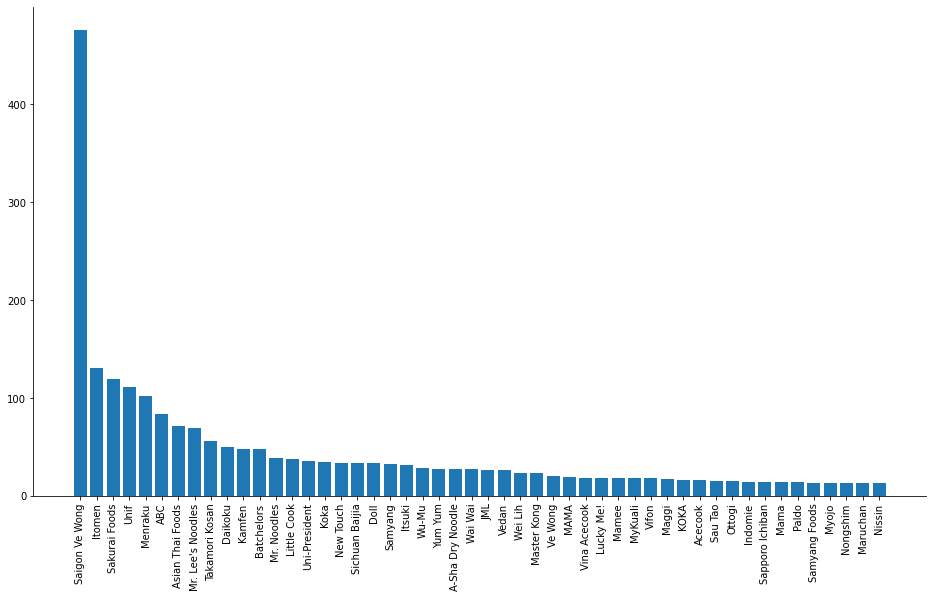

In [42]:
 # plot a barplot for the top 50 brands of ramen
#change thte figure size
plt.figure(figsize=(16,9))

plt.bar(brand_count.sort_values(ascending=True).index, brand_count)

# by placing h in bar above ie plt.barh() the plot lies horizontal

# rotate the x lebels
plt.xticks(rotation = 90)

sns.despine()

In [46]:
# explore style
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

In [47]:
# order in ascending form
style_count.sort_values(ascending = True)

Can              1
Bar              1
Restaurant       3
Box             54
Tray           167
Cup            659
Bowl           722
Pack          2085
Name: Style, dtype: int64

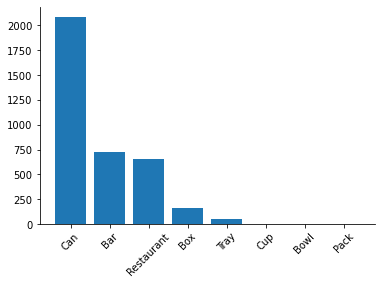

In [49]:
# plot a barplot on style_count
plt.bar(style_count.sort_values(ascending = True).index, style_count)
plt.xticks(rotation=45)

sns.despine()

In [55]:
# explore country column
country_count = df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Myanmar                14
Nepal                  14
Bangladesh             12
Hungary                 9
Pakistan                9
France                  6
Poland                  6
Colombia                6
Cambodia                5
Russia                  5
Sarawak                 5
Fiji                    4
Holland                 4
Italy                   4
Peru                    4
Ukraine                 3
Finland                 3
Sweden                  3
Dubai       

In [70]:
# finding the length of the country_count
len(country_count)

51

In [57]:
country_count.sort_values(ascending = True)

Russian Federation      1
USA                     1
New Zealand             1
United Kingdom          1
Portugal                1
Phlippines              1
Souh Korea              1
Ghana                   2
Estonia                 2
Nigeria                 2
Finland                 3
Ukraine                 3
Spain                   3
Israel                  3
Dubai                   3
Sweden                  3
Peru                    4
Italy                   4
Holland                 4
Fiji                    4
Sarawak                 5
Russia                  5
Cambodia                5
Poland                  6
Colombia                6
France                  6
Hungary                 9
Pakistan                9
Bangladesh             12
Nepal                  14
Myanmar                14
Netherlands            16
Brazil                 24
Australia              25
Germany                28
Mexico                 32
India                  45
Philippines            51
Canada      

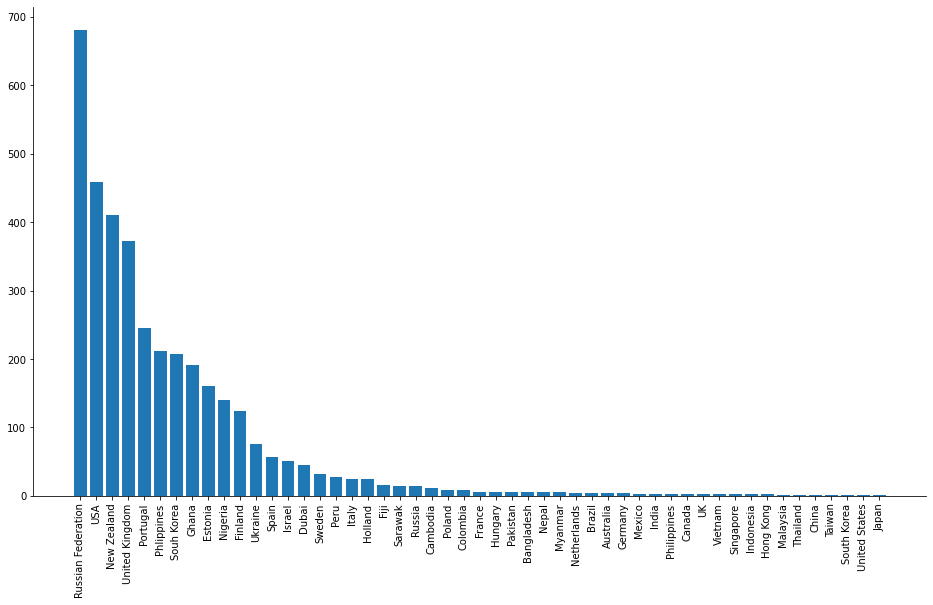

In [68]:
# increasing the size of the graph
plt.figure(figsize=(16,9))

# ploting a barplot for the country column in ascending order
plt.bar(country_count.sort_values(ascending = True).index, country_count )

#making the x text slant in 90 degrees
plt.xticks(rotation = 90)

sns.despine()

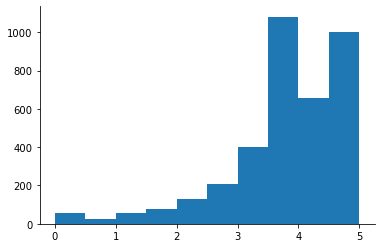

In [73]:
# examine the distibution of scores in 'stars'
plt.hist(df['Stars'])

sns.despine()

In [79]:
# examining the mean and meddian of the 'Stars' column

df['Stars'].median()

3.75

<AxesSubplot:xlabel='isspicy', ylabel='count'>

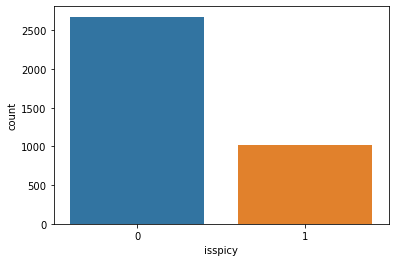

In [80]:
# count occurence of 1s and 0s in isspicy column
sns.countplot(df['isspicy'])

<AxesSubplot:xlabel='haschicken', ylabel='count'>

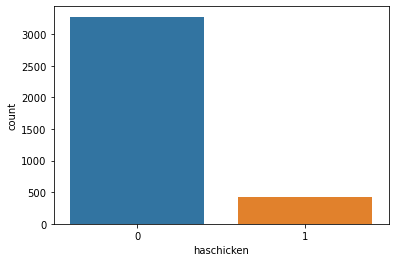

In [81]:
# frequency of 1s and 0s in haschicken column
sns.countplot(df['haschicken'])

<AxesSubplot:xlabel='isseafood', ylabel='count'>

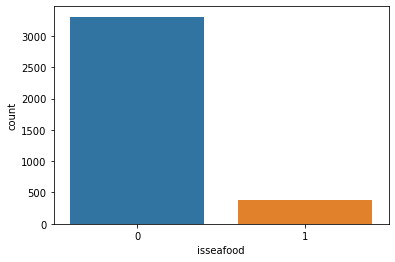

In [82]:
# frequency of 1s and 0s in haschicken column
sns.countplot(df['isseafood'])

<AxesSubplot:xlabel='hasbeef', ylabel='count'>

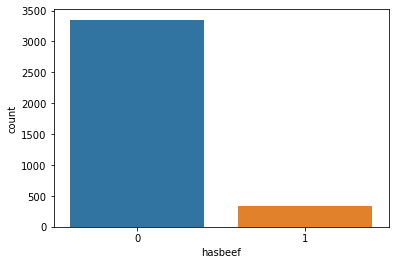

In [83]:
# frequency of 1s and 0s in hasbeef column
sns.countplot(df['hasbeef'])

## Questions to ask

1. Which country has the highesy stars?
2. which brand has the highest stars?
3. which noodles has highest stars - spicy or non-spicy

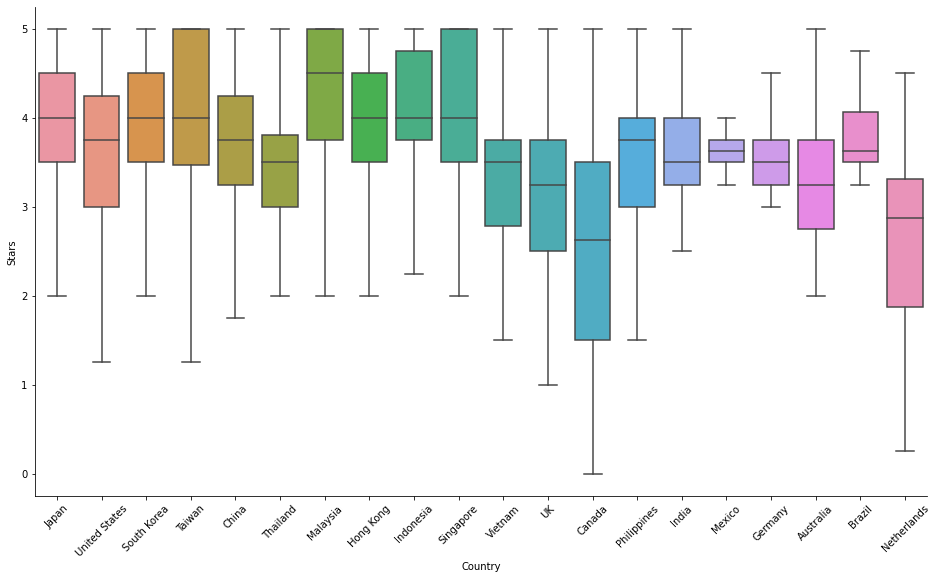

In [98]:
# Question 1
plt.figure(figsize = (16,9))

# the showflier false function removes the outliers
# being a large data the first 20 are considered with the order function
sns.boxplot(df['Country'], df['Stars'],
            order=country_count.index[:20],
           showfliers=False)
plt.xticks(rotation = 45)
sns.despine()

Malaysia is the country with the highest stars as it is consistent and normal.

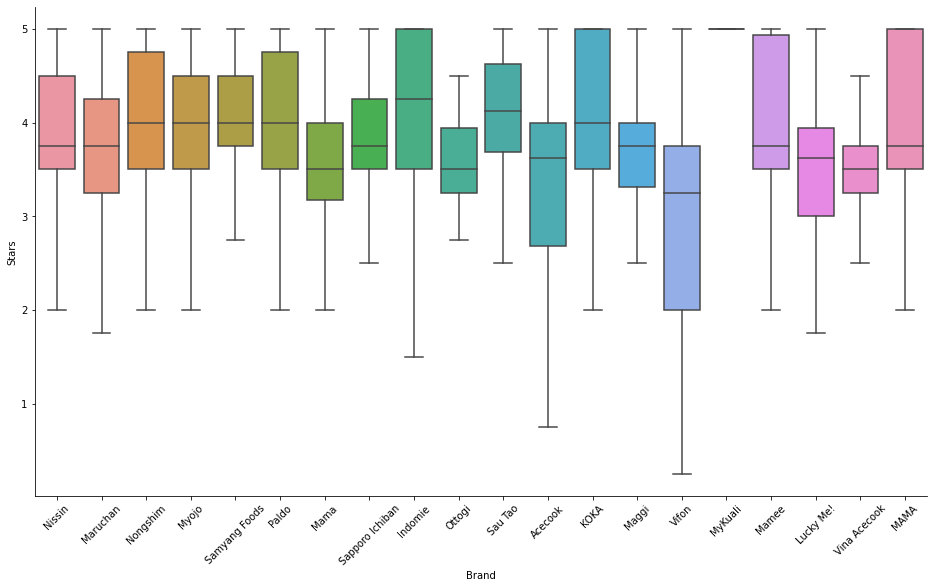

In [96]:
# Question 2
plt.figure(figsize = (16,9))

# the showflier false function removes the outliers
# being a large data the first 20 are considered with the order function
sns.boxplot(df['Brand'], df['Stars'],
            order=brand_count.index[:20],
           showfliers=False)
plt.xticks(rotation = 45)
sns.despine()

In [97]:
df[df['Brand'] == 'MyKuali']

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef,isseafood
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


MyKuali is the brand with the highest starts

<AxesSubplot:xlabel='isspicy', ylabel='Stars'>

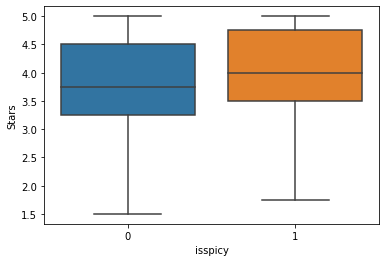

In [101]:
# Question 3: which noodle has higher stars
sns.boxplot(df['isspicy'], df['Stars'], showfliers= False)


In [104]:
# filter two dataframe
spicy_df = df[df['isspicy'] == 1]
nonspicy_df = df[df['isspicy'] == 0]

In [105]:
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.8379556650246305
3.678978333955921


In [106]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


<AxesSubplot:xlabel='Stars', ylabel='Density'>

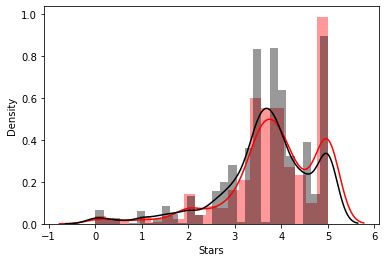

In [115]:
sns.distplot(spicy_df['Stars'], color = 'red')
sns.distplot(nonspicy_df['Stars'], color = 'black')

In [116]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu

In [117]:
mannwhitneyu(spicy_df['Stars'],
            nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1217227.0, pvalue=4.2309712730882353e-07)

<AxesSubplot:xlabel='haschicken', ylabel='Stars'>

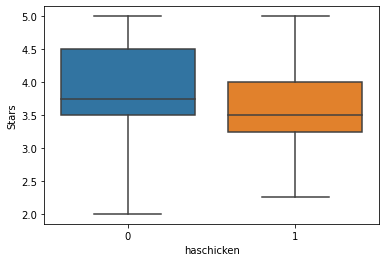

In [125]:
sns.boxplot(df['haschicken'], df['Stars'], showfliers=False)

In [126]:
mannwhitneyu(df[df['haschicken']==0]['Stars'],
            df[df['haschicken'] == 1]['Stars'])

MannwhitneyuResult(statistic=553006.5, pvalue=5.840587494609923e-11)

<AxesSubplot:xlabel='hasbeef', ylabel='Stars'>

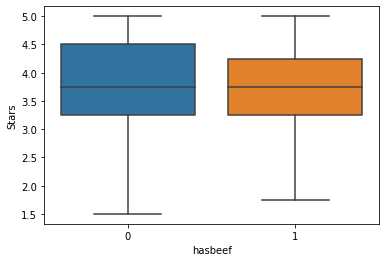

In [127]:
sns.boxplot(df['hasbeef'], df['Stars'], showfliers=False)

In [128]:
mannwhitneyu(df[df['hasbeef']==0]['Stars'],
            df[df['hasbeef'] == 1]['Stars'])

MannwhitneyuResult(statistic=515444.0, pvalue=0.0017163109094367611)

<AxesSubplot:xlabel='isseafood', ylabel='Stars'>

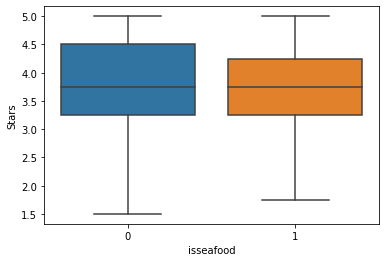

In [134]:
sns.boxplot(df['isseafood'], df['Stars'], showfliers=False)

In [135]:
mannwhitneyu(df[df['isseafood']==0]['Stars'],
            df[df['isseafood'] == 1]['Stars'])

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

In [137]:
df

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef,isseafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [139]:
# save df as csv
df.to_csv('thebiglist_clean_extended.csv', index=None)

In [140]:
pd.read_csv('thebiglist_clean_extended.csv')

,Brand,Variety,Style,Country,Stars,isspicy,haschicken,hasbeef,isseafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


### Summary
    1. Examined the variety column.
    2. Extraction of useful information from variety
            -isspicy
            -haschicken
            -hasbeef
            -isseafood
    3. Perfomed visualizations to answer seveeral questions
    4. Exported the extended DataFrame
            